In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('AB_NYC_2019.csv')

# Remoção manual de atributos irrelevantes para determinação do valor do atributo alvo (price)

df = df.drop(['name', 'host_name', 'last_review', 'number_of_reviews', 'reviews_per_month', 'id', 'host_id', 'calculated_host_listings_count', 'neighbourhood'], axis=1)

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  object 
 1   latitude             48895 non-null  float64
 2   longitude            48895 non-null  float64
 3   room_type            48895 non-null  object 
 4   price                48895 non-null  int64  
 5   minimum_nights       48895 non-null  int64  
 6   availability_365     48895 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.6+ MB
None
           latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69

In [142]:
""" # Pré processamento de dados, conversão simbólica -> numérica

# Visualização dos valores simbólicos únicos para conversão em número 

print(df['neighbourhood_group'].unique())
print(df['neighbourhood'].unique())
print(df['room_type'].unique()) """

" # Pré processamento de dados, conversão simbólica -> numérica\n\n# Visualização dos valores simbólicos únicos para conversão em número \n\nprint(df['neighbourhood_group'].unique())\nprint(df['neighbourhood'].unique())\nprint(df['room_type'].unique()) "

In [143]:
""" # Conversão simbólico -> numérico binário

valuesN = df['neighbourhood'].unique()

num_bitsN = len(bin(len(valuesN) - 1)) - 2

# Mapeamento dos valores binários
mappingNG = {'Brooklyn': '1', 'Manhattan': '2', 'Queens': '3', 'Staten Island': '4', 'Bronx': '5'}
mappingN = {val: format(idx, '0' + str(num_bitsN) + 'b') for idx, val in enumerate(valuesN)}
mappingRT = {'Private room': '1', 'Entire home/apt': '2', 'Shared room': '3'}
 
# Substituição dos valores no DF
df['neighbourhood_group'] = df['neighbourhood_group'].replace(mappingNG)
df['neighbourhood'] = df['neighbourhood'].map(mappingN)
df['room_type'] = df['room_type'].map(mappingRT)

df = df.drop(['neighbourhood'], axis=1)

print(df) """

" # Conversão simbólico -> numérico binário\n\nvaluesN = df['neighbourhood'].unique()\n\nnum_bitsN = len(bin(len(valuesN) - 1)) - 2\n\n# Mapeamento dos valores binários\nmappingNG = {'Brooklyn': '1', 'Manhattan': '2', 'Queens': '3', 'Staten Island': '4', 'Bronx': '5'}\nmappingN = {val: format(idx, '0' + str(num_bitsN) + 'b') for idx, val in enumerate(valuesN)}\nmappingRT = {'Private room': '1', 'Entire home/apt': '2', 'Shared room': '3'}\n \n# Substituição dos valores no DF\ndf['neighbourhood_group'] = df['neighbourhood_group'].replace(mappingNG)\ndf['neighbourhood'] = df['neighbourhood'].map(mappingN)\ndf['room_type'] = df['room_type'].map(mappingRT)\n\ndf = df.drop(['neighbourhood'], axis=1)\n\nprint(df) "

In [144]:
from sklearn.preprocessing import OneHotEncoder

# Inicialização do OneHotEncoder para converter os valores para binário onde cada valor ocupa uma coluna
enc = OneHotEncoder()

df_enc = enc.fit_transform(df[['room_type']]).toarray()
df_enc = pd.DataFrame(df_enc, columns=enc.get_feature_names_out(['room_type']))
df_enc = df_enc.astype(int)

# Substituição dos valores originais do DF 
df.drop(columns=['room_type'], inplace=True)
df[enc.get_feature_names_out(['room_type'])] = df_enc

df_enc = enc.fit_transform(df[['neighbourhood_group']]).toarray()
df_enc = pd.DataFrame(df_enc, columns=enc.get_feature_names_out(['neighbourhood_group']))
df_enc = df_enc.astype(int)

df.drop(columns=['neighbourhood_group'], inplace=True)
df[enc.get_feature_names_out(['neighbourhood_group'])] = df_enc

print(df.describe())

           latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       availability_365  room_type_Entire home/apt  room_type_Private room  \
count      48895.000000               48895.000000            48895.000000   
mean         112.781327                   0.519665                0.456611   
std          131.622289                   0.499618                0.498119   
min            0.000000                   0.000000                0.000000   
25%   

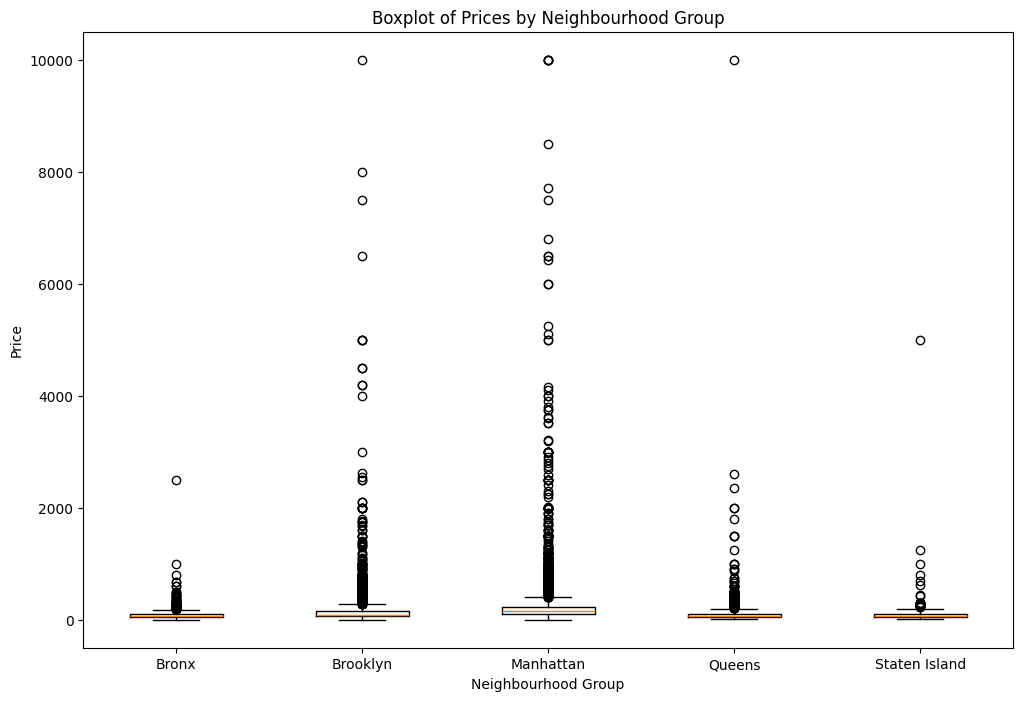

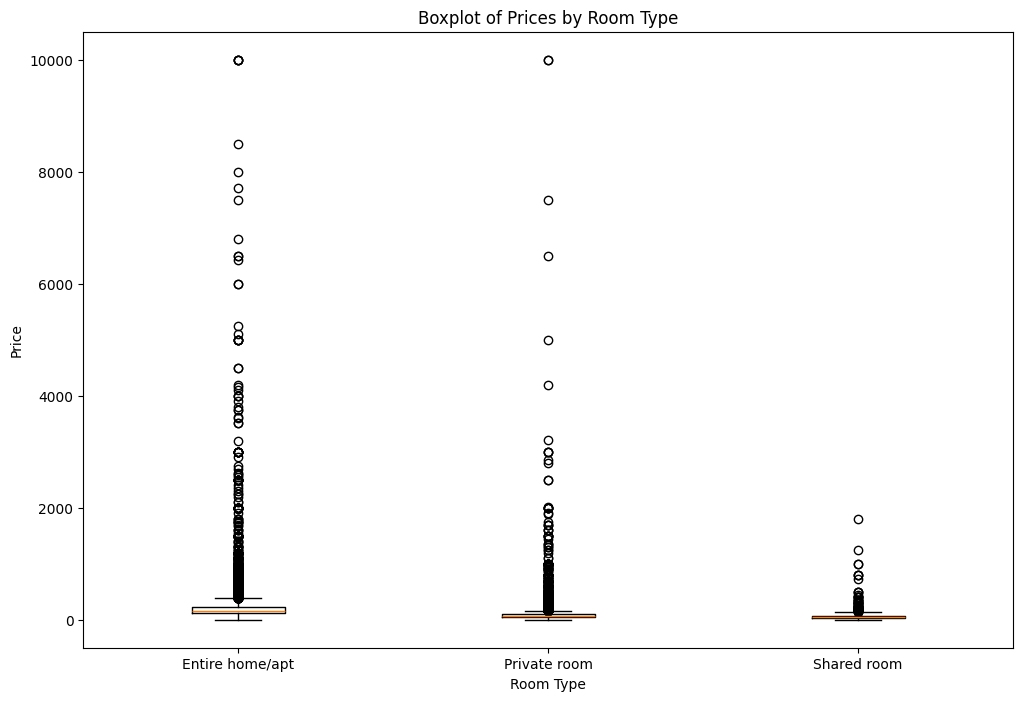

<Figure size 640x480 with 0 Axes>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Criação de boxplots para cada bairro em relação ao preço para visualização de outliers
plt.figure(figsize=(12, 8))
plt.boxplot(
    [df[df[col] == 1]['price'] for col in df.columns if col.startswith('neighbourhood_group_')],
    labels=[col.replace('neighbourhood_group_', '') for col in df.columns if col.startswith('neighbourhood_group_')]
)
plt.title('Boxplot of Prices by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

# Criação de boxplots para cada tipo de sala em relação ao preço para visualização de outliers
plt.figure(figsize=(12, 8))
plt.boxplot(
    [df[df[col] == 1]['price'] for col in df.columns if col.startswith('room_type_')],
    labels=[col.replace('room_type_', '') for col in df.columns if col.startswith('room_type_')]
)
plt.title('Boxplot of Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

plt.tight_layout()
plt.show()

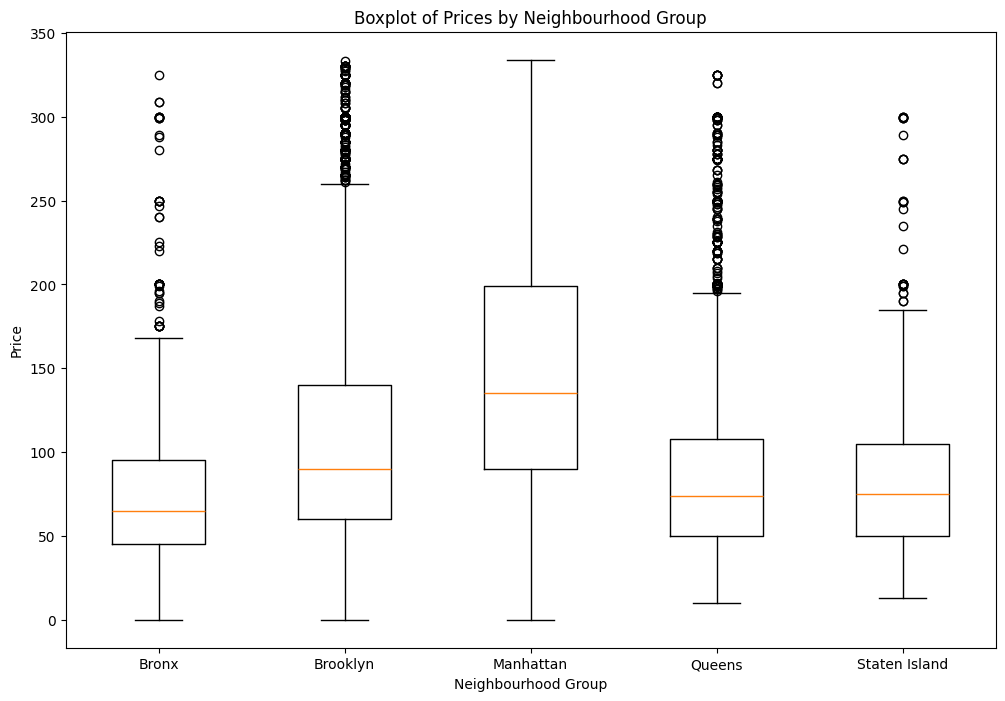

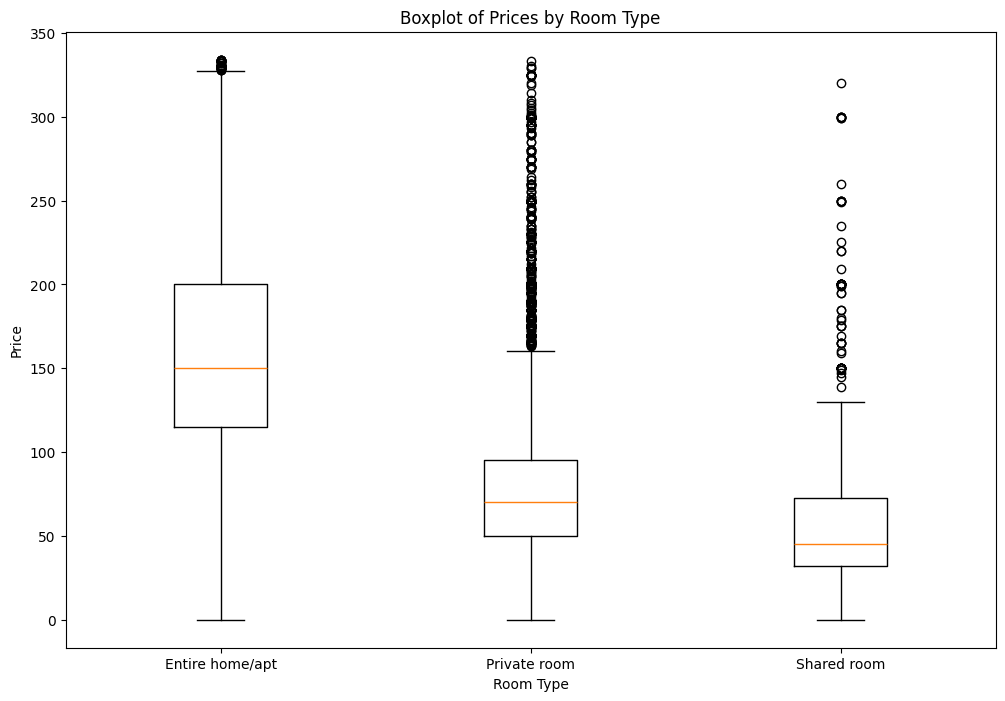

<Figure size 640x480 with 0 Axes>

In [146]:
# Cálculo do quartil
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Cálculo do limite dos outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remoção dos outliers fora do limite
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

plt.figure(figsize=(12, 8))
plt.boxplot(
    [df[df[col] == 1]['price'] for col in df.columns if col.startswith('neighbourhood_group_')],
    labels=[col.replace('neighbourhood_group_', '') for col in df.columns if col.startswith('neighbourhood_group_')]
)
plt.title('Boxplot of Prices by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 8))
plt.boxplot(
    [df[df[col] == 1]['price'] for col in df.columns if col.startswith('room_type_')],
    labels=[col.replace('room_type_', '') for col in df.columns if col.startswith('room_type_')]
)
plt.title('Boxplot of Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

plt.tight_layout()
plt.show()

           latitude     longitude         price  minimum_nights  \
count  45923.000000  45923.000000  45923.000000    45923.000000   
mean      40.728488    -73.950733    119.970320        6.938070   
std        0.055331      0.046471     68.150148       19.857823   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.689235    -73.981925     65.000000        1.000000   
50%       40.721770    -73.954370    100.000000        2.000000   
75%       40.763390    -73.934315    159.000000        5.000000   
max       40.913060    -73.712990    334.000000     1250.000000   

       availability_365  room_type_Entire home/apt  room_type_Private room  \
count      45923.000000               45923.000000            45923.000000   
mean         109.378699                   0.496244                0.478976   
std          130.279393                   0.499991                0.499563   
min            0.000000                   0.000000                0.000000   
25%   

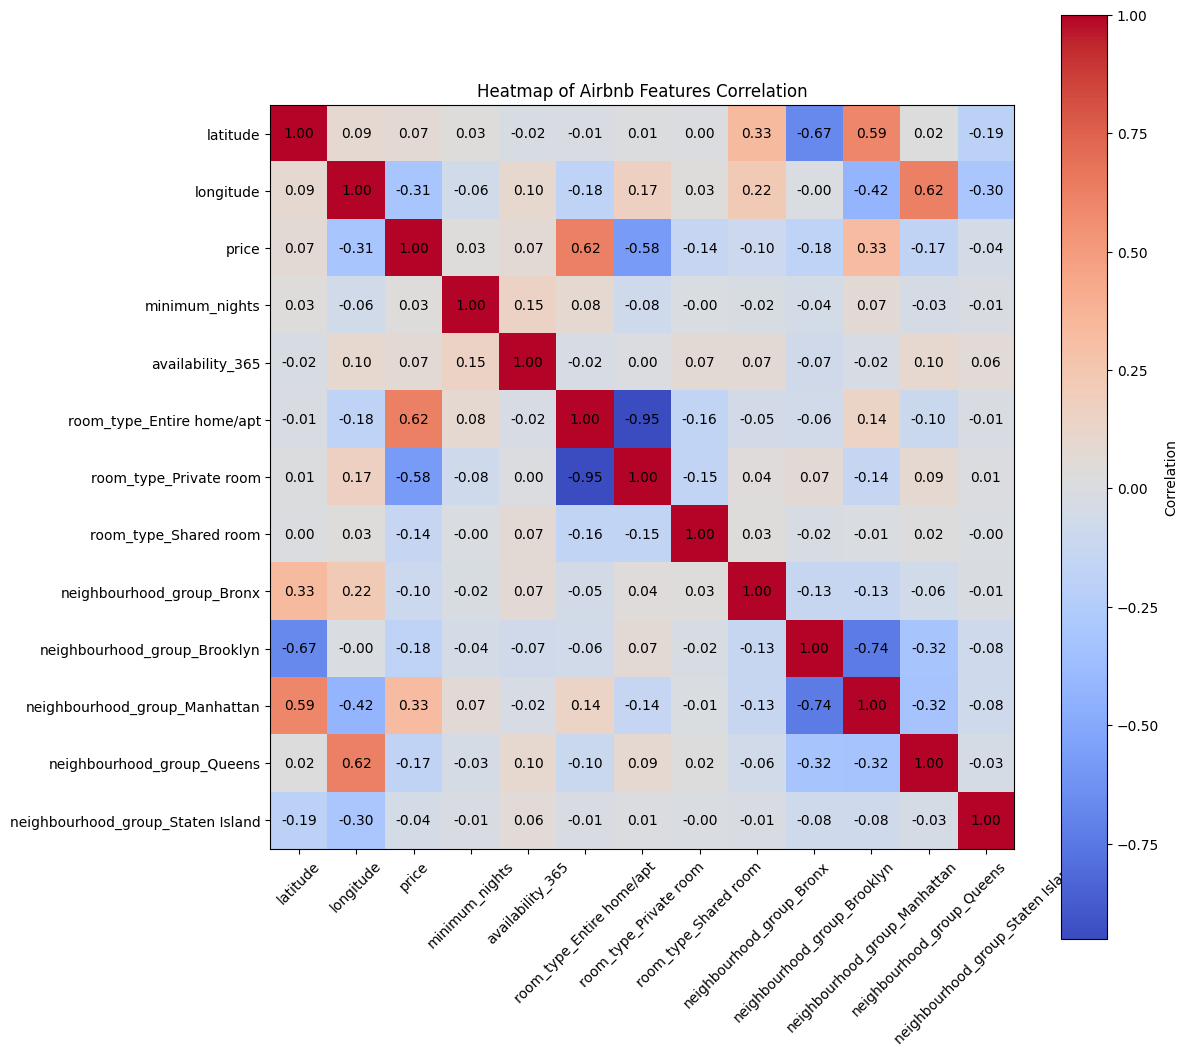

In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print(df.describe())

""" df = df.drop(['minimum_nights', 'availability_365'], axis=1) """
 
""" scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns]) """

# Cálculo da correlação
corr = df.corr()

# Heatmap
attributes = df.columns.tolist()
plt.figure(figsize=(12, 12))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')

for i in range(len(attributes)):
    for j in range(len(attributes)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.colorbar(label='Correlation')
plt.title('Heatmap of Airbnb Features Correlation')
plt.xticks(range(len(attributes)), attributes, rotation=45)
plt.yticks(range(len(attributes)), attributes)
plt.show()




In [148]:
import pandas as pd

# Correlação
corr = df.corr()

# Limite de correlação
threshold = 0.3

# Correlação com o atributo alvo
corr_target = abs(corr['price'])

# Seleção das features
features = corr_target[corr_target > threshold].index.tolist()

print(features)

# Novo DF com as features selecionadas
selected_df = df[features]

Selected features:  ['longitude', 'price', 'room_type_Entire home/apt', 'room_type_Private room', 'neighbourhood_group_Manhattan']


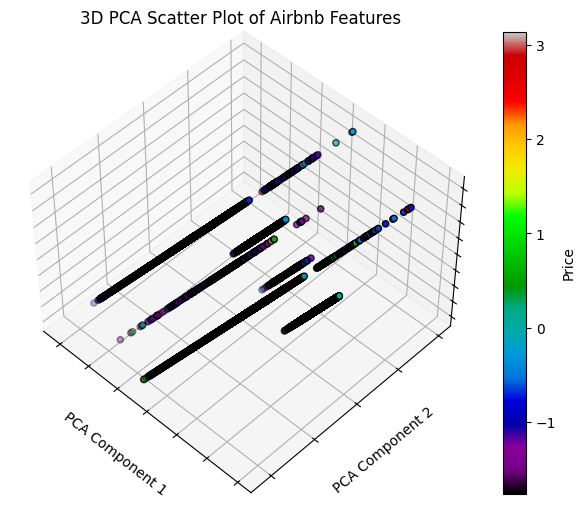

In [150]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# StandardScaler para todas as features seguirem a mesma escala, ao redor do 0
scaler = StandardScaler()
selected_df.loc[:, selected_df.columns] = scaler.fit_transform(selected_df[selected_df.columns])

# Seleção das features a serem analisadas e atributo alvo
X = selected_df.drop('price', axis=1)
y = selected_df['price']

# Scatter plot 3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d', elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

# PCA
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Scatter plot 3D
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor='k')

plt.colorbar(sc, ax=ax, label='Price')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.title('3D PCA Scatter Plot of Airbnb Features')
plt.show()
